In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import plotly.express as px

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [2]:
df= pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df[[ 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']].nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<Axes: xlabel='Sex'>

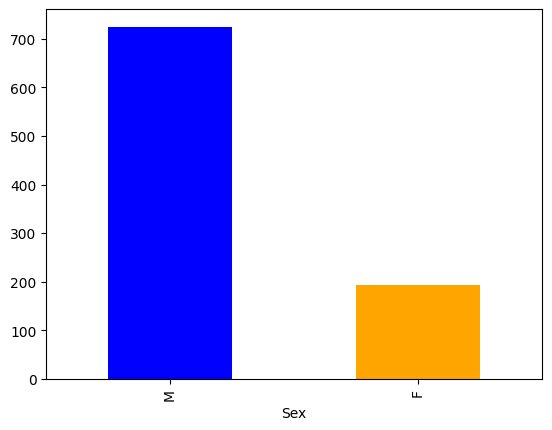

In [9]:
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

<Axes: xlabel='ChestPainType'>

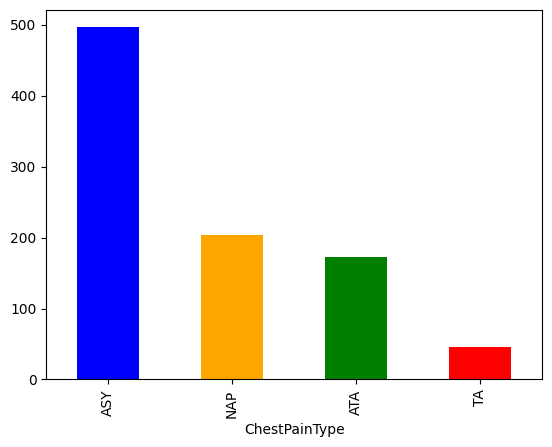

In [10]:
df['ChestPainType'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

<Axes: xlabel='FastingBS'>

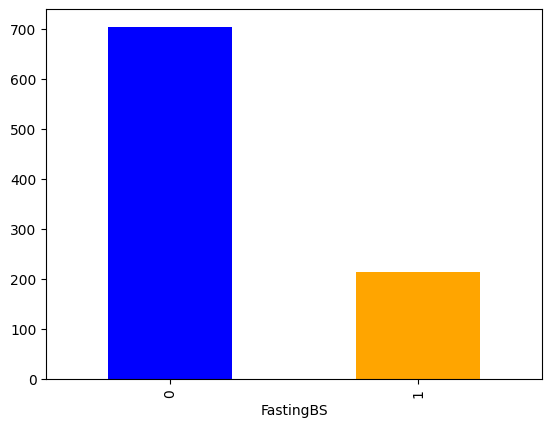

In [11]:
df['FastingBS'].value_counts().plot(kind='bar', color=['blue', 'orange'])


<Axes: xlabel='RestingECG'>

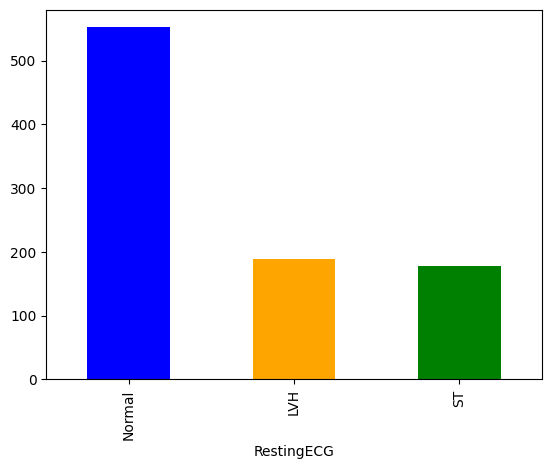

In [12]:
df['RestingECG'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])

<Axes: xlabel='ExerciseAngina'>

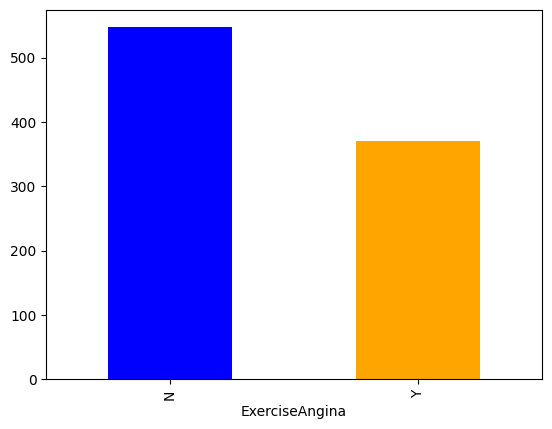

In [13]:
df['ExerciseAngina'].value_counts().plot(kind='bar', color=['blue', 'orange'])

<Axes: xlabel='ST_Slope'>

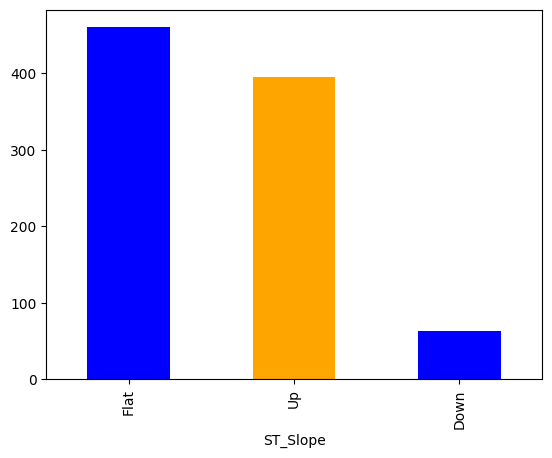

In [14]:
df['ST_Slope'].value_counts().plot(kind='bar', color=['blue', 'orange'])

<Axes: xlabel='HeartDisease'>

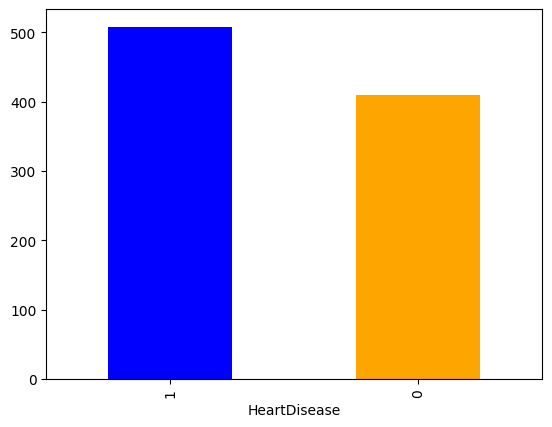

In [15]:
df['HeartDisease'].value_counts().plot(kind='bar', color=['blue', 'orange'])

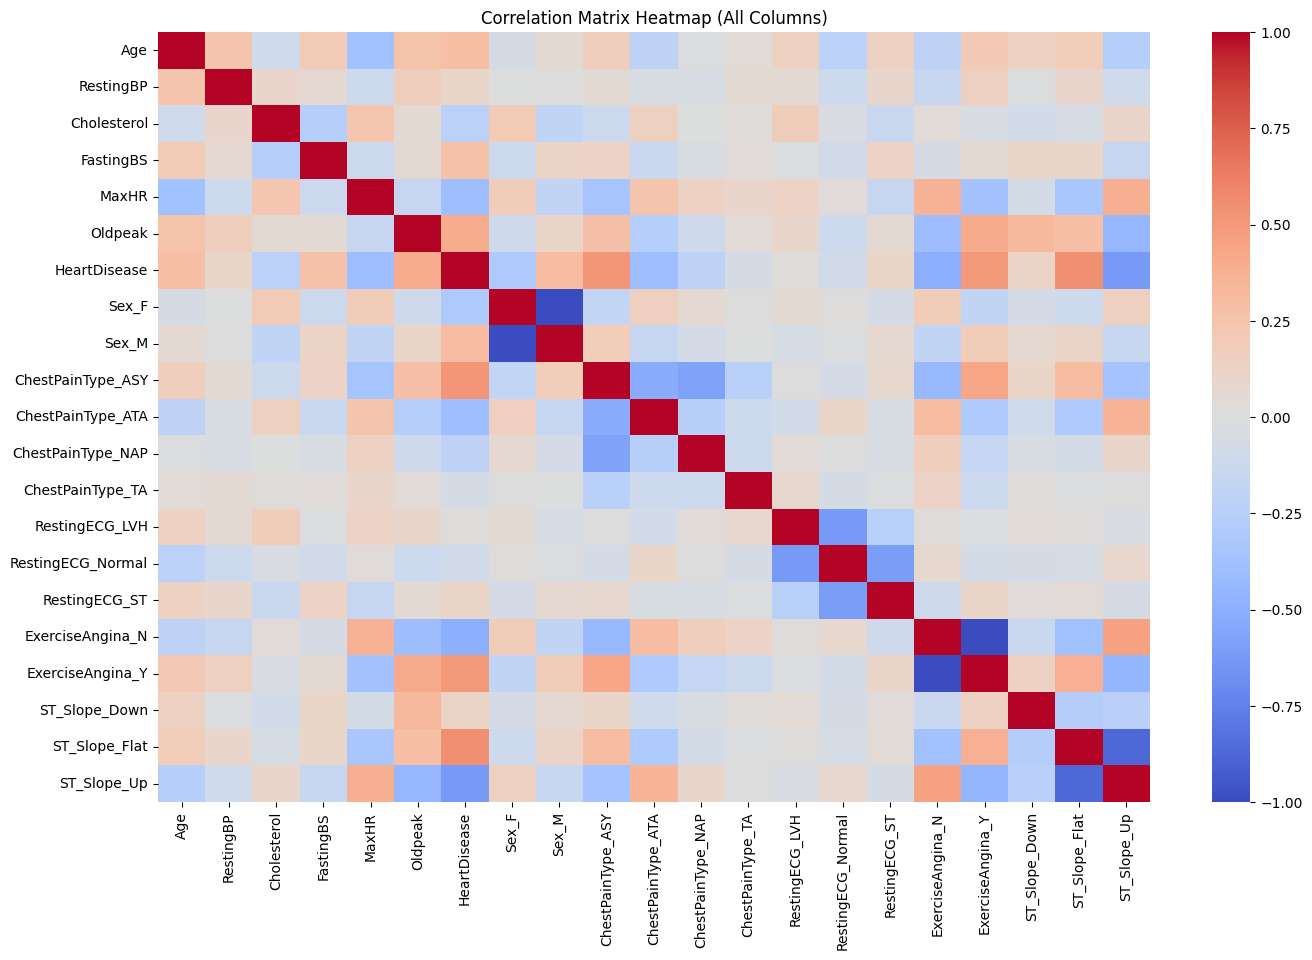

In [16]:
df_encoded = pd.get_dummies(df)

plt.figure(figsize=(16, 10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (All Columns)')
plt.show()

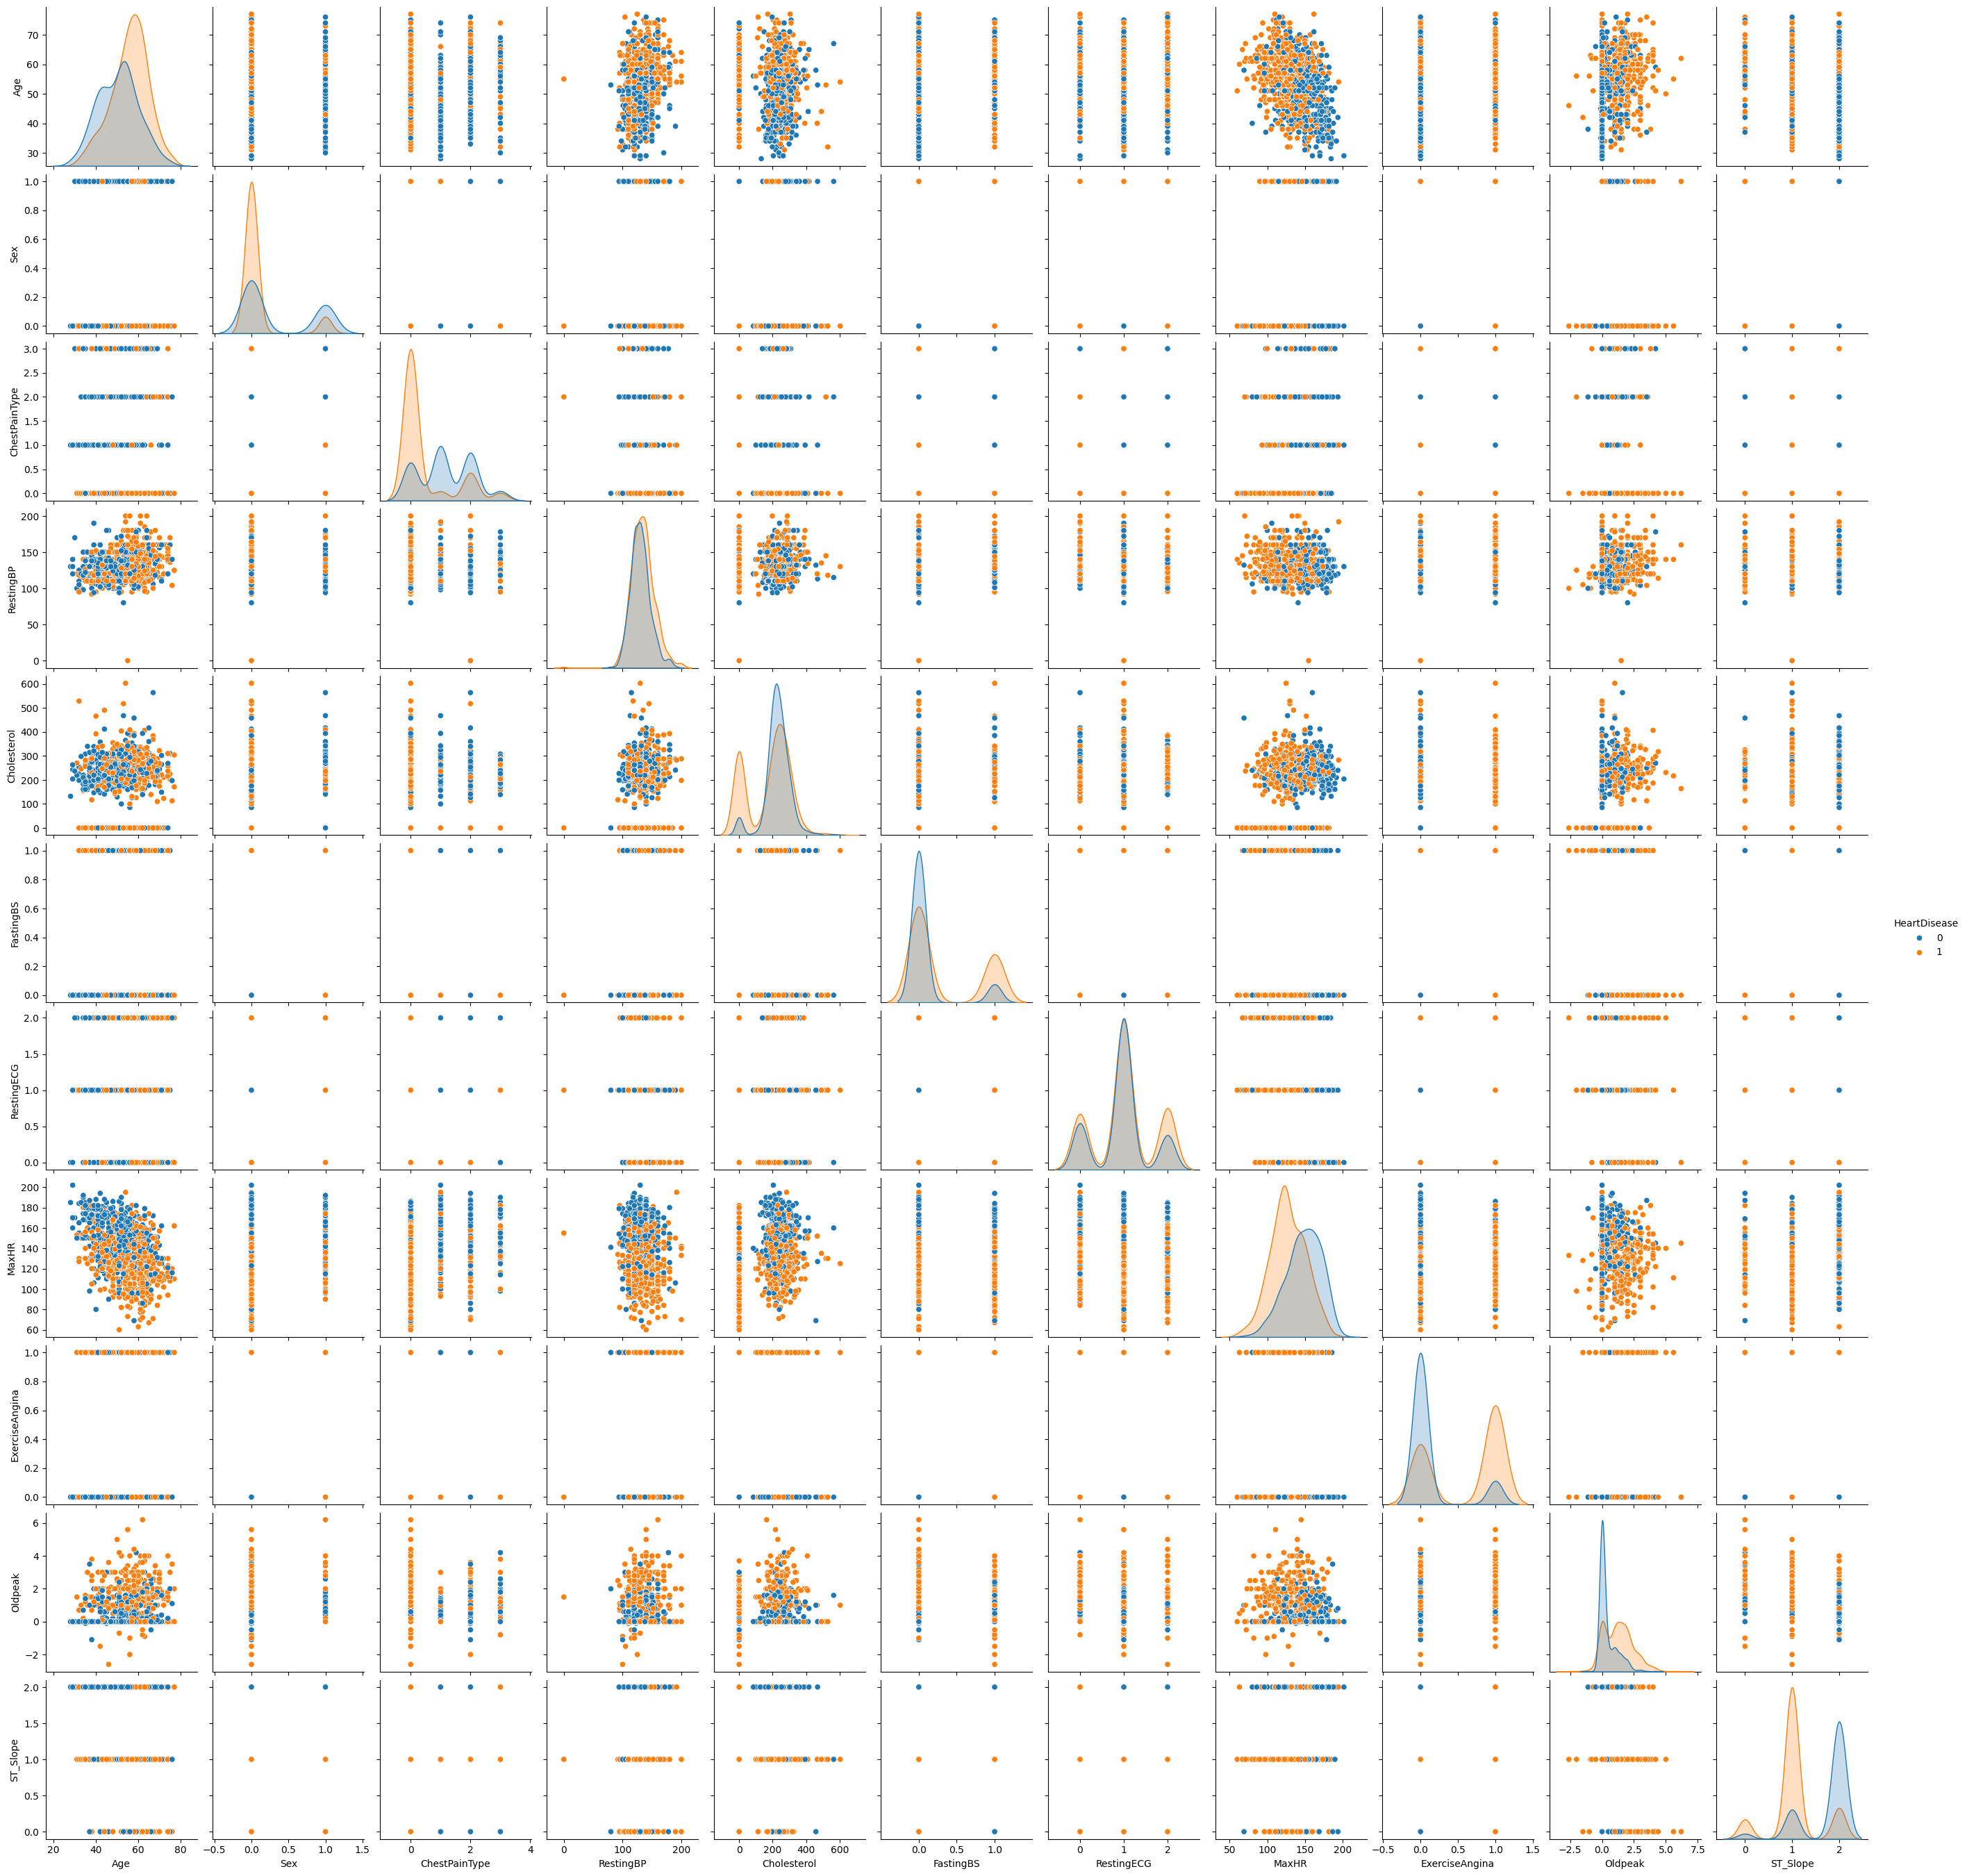

In [17]:
df_plot = df.copy()


df_plot['Sex'] = df_plot['Sex'].map({'M': 0, 'F': 1})  
df_plot['ChestPainType'] = df_plot['ChestPainType'].astype('category').cat.codes
df_plot['RestingECG'] = df_plot['RestingECG'].astype('category').cat.codes
df_plot['ExerciseAngina'] = df_plot['ExerciseAngina'].map({'N': 0, 'Y': 1})
df_plot['ST_Slope'] = df_plot['ST_Slope'].astype('category').cat.codes


cols = [
    'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'
]

sns.pairplot(df_plot[cols], hue='HeartDisease')
plt.show()

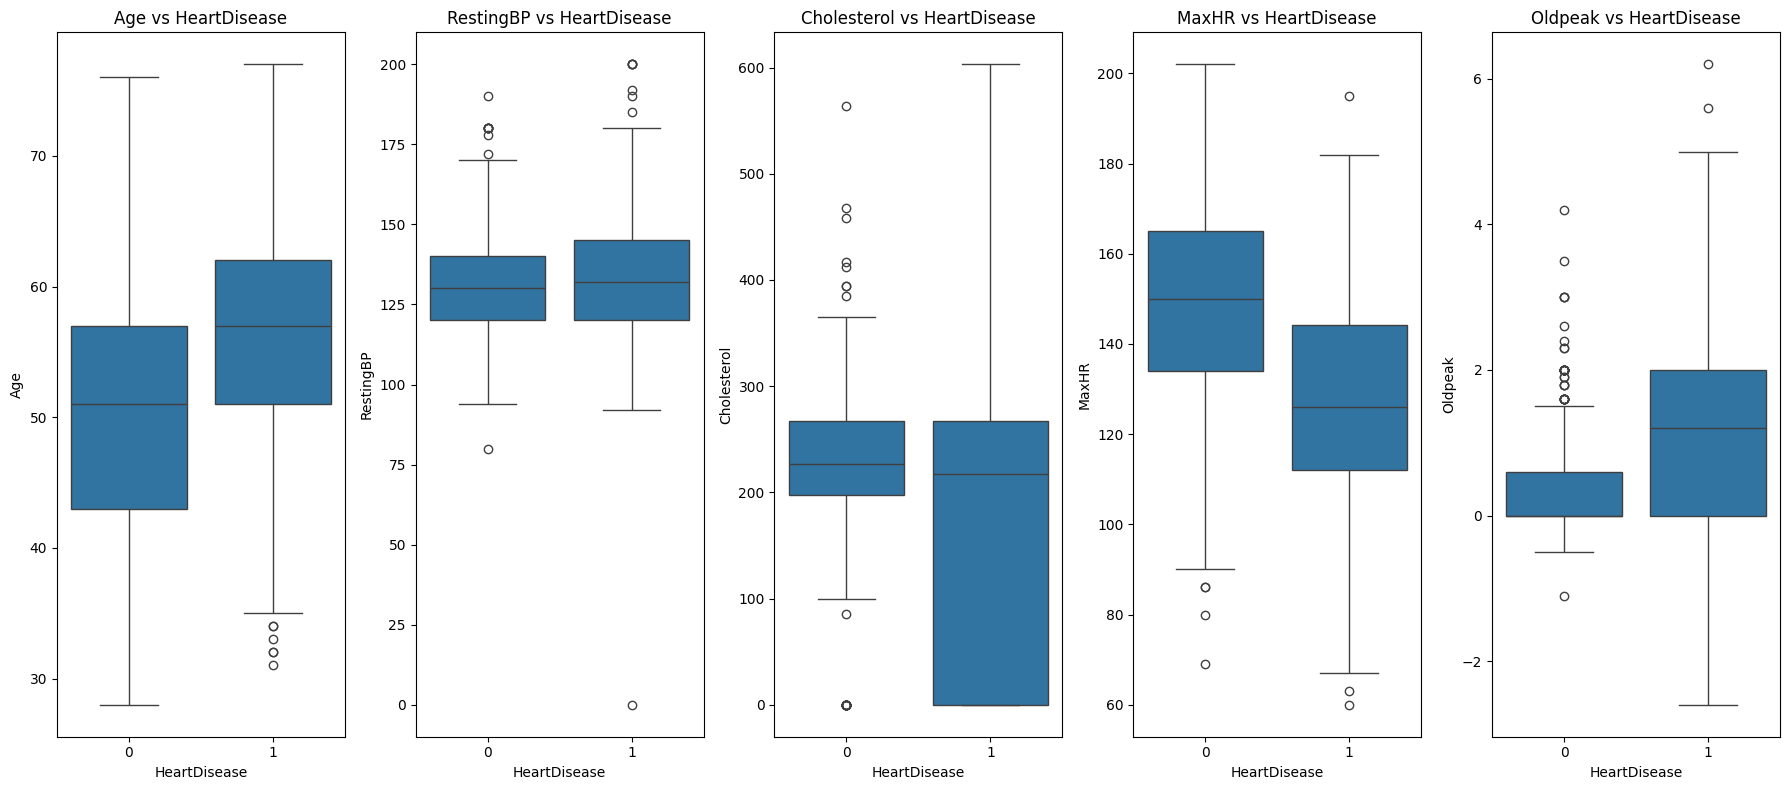

In [18]:
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(18, 8))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} vs HeartDisease')
plt.tight_layout()
plt.show()

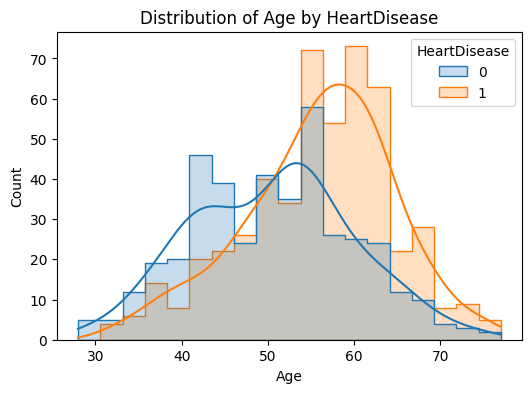

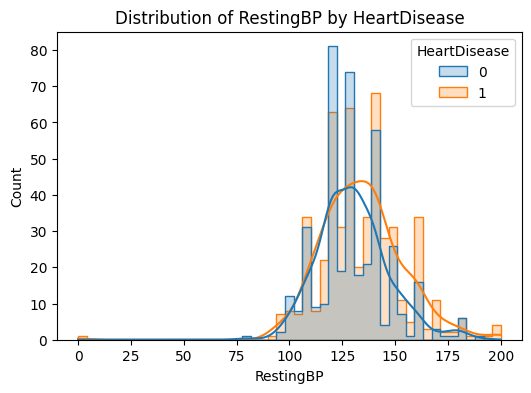

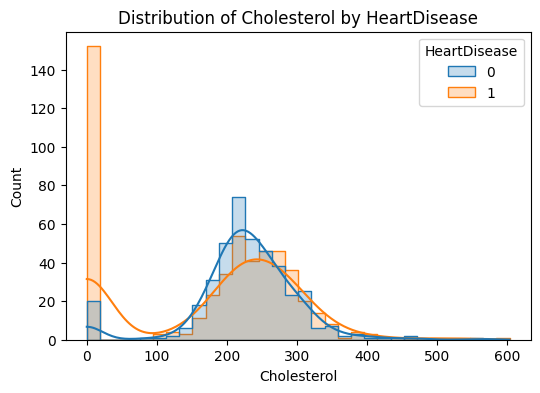

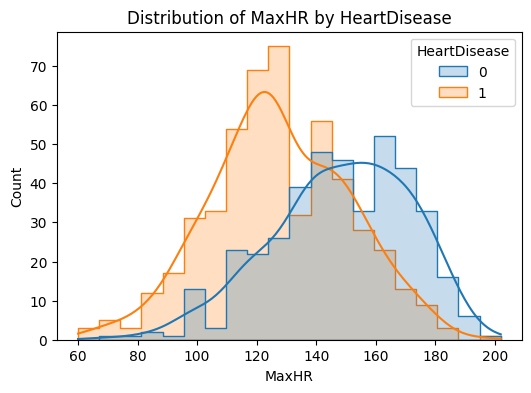

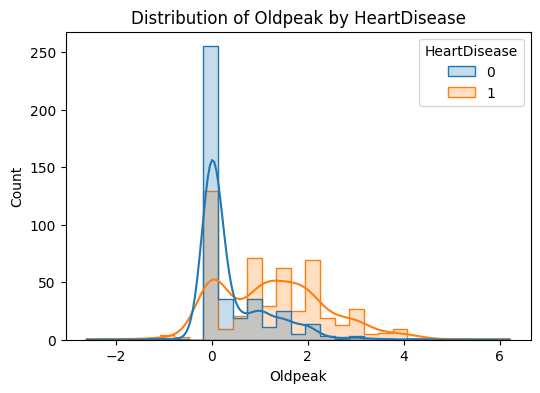

In [19]:
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='HeartDisease', kde=True, element="step")
    plt.title(f'Distribution of {col} by HeartDisease')
    plt.show()

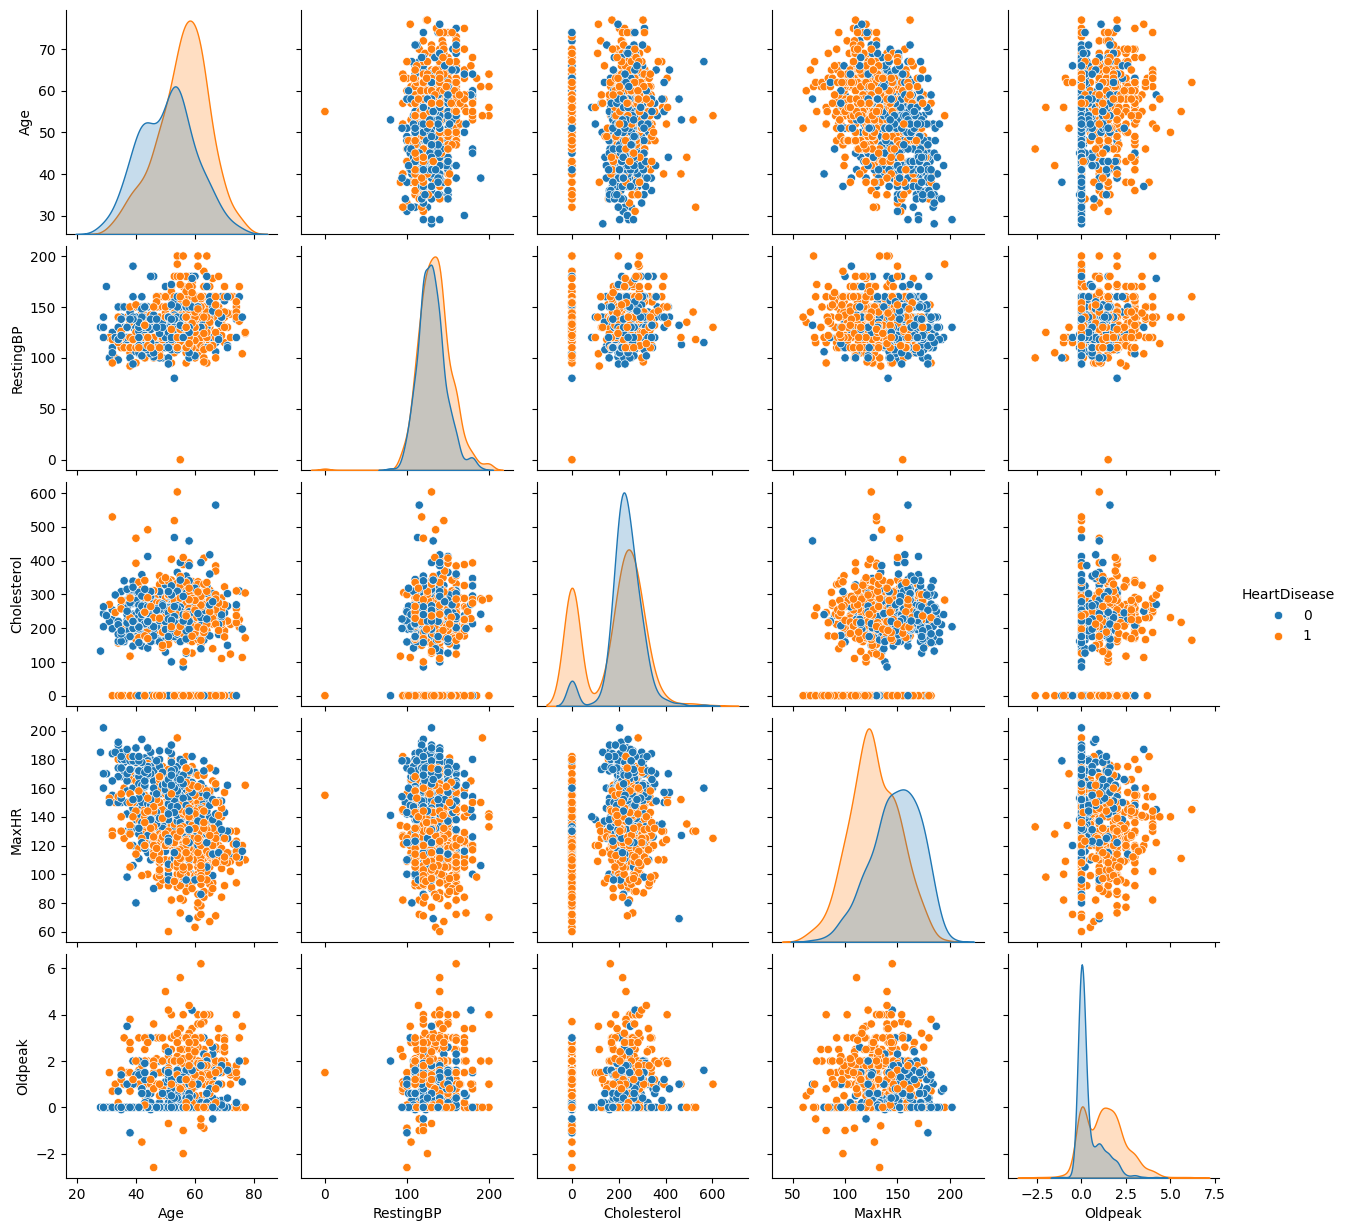

In [20]:
sns.pairplot(df[features + ['HeartDisease']], hue='HeartDisease')
plt.show()

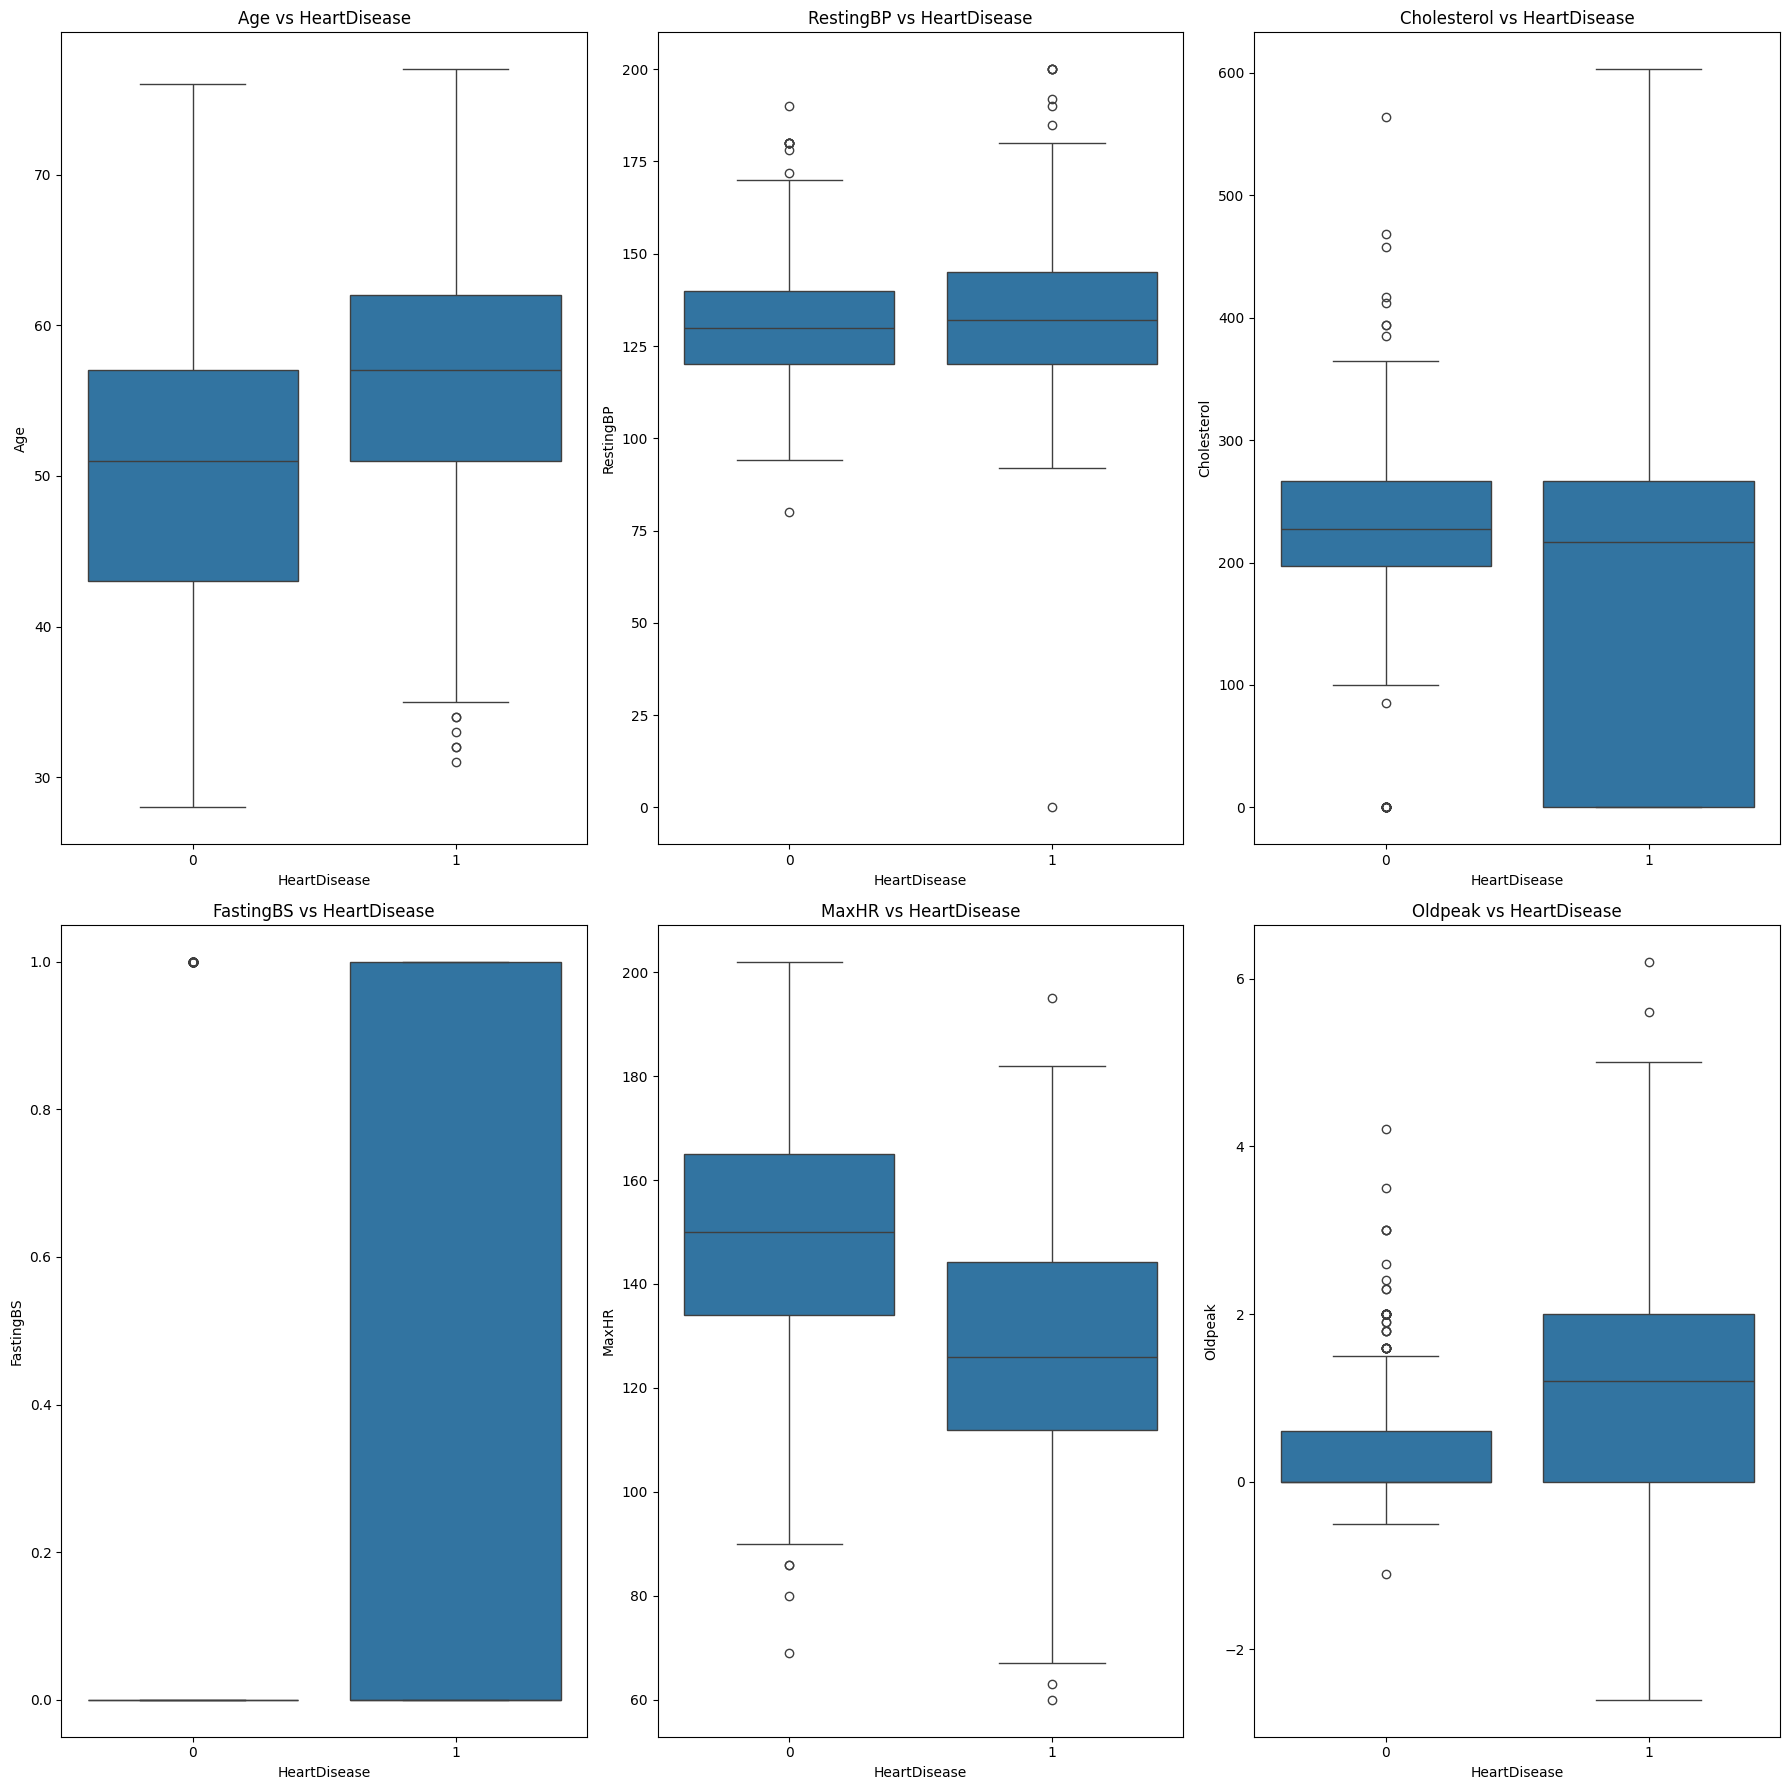

In [21]:
numeric_cols = [col for col in df.columns if col != 'HeartDisease' and df[col].dtype in ['float64', 'int64']]

plt.figure(figsize=(18, 3 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) - 1)//3 + 1, 3, i+1)
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} vs HeartDisease')
plt.tight_layout()
plt.show()

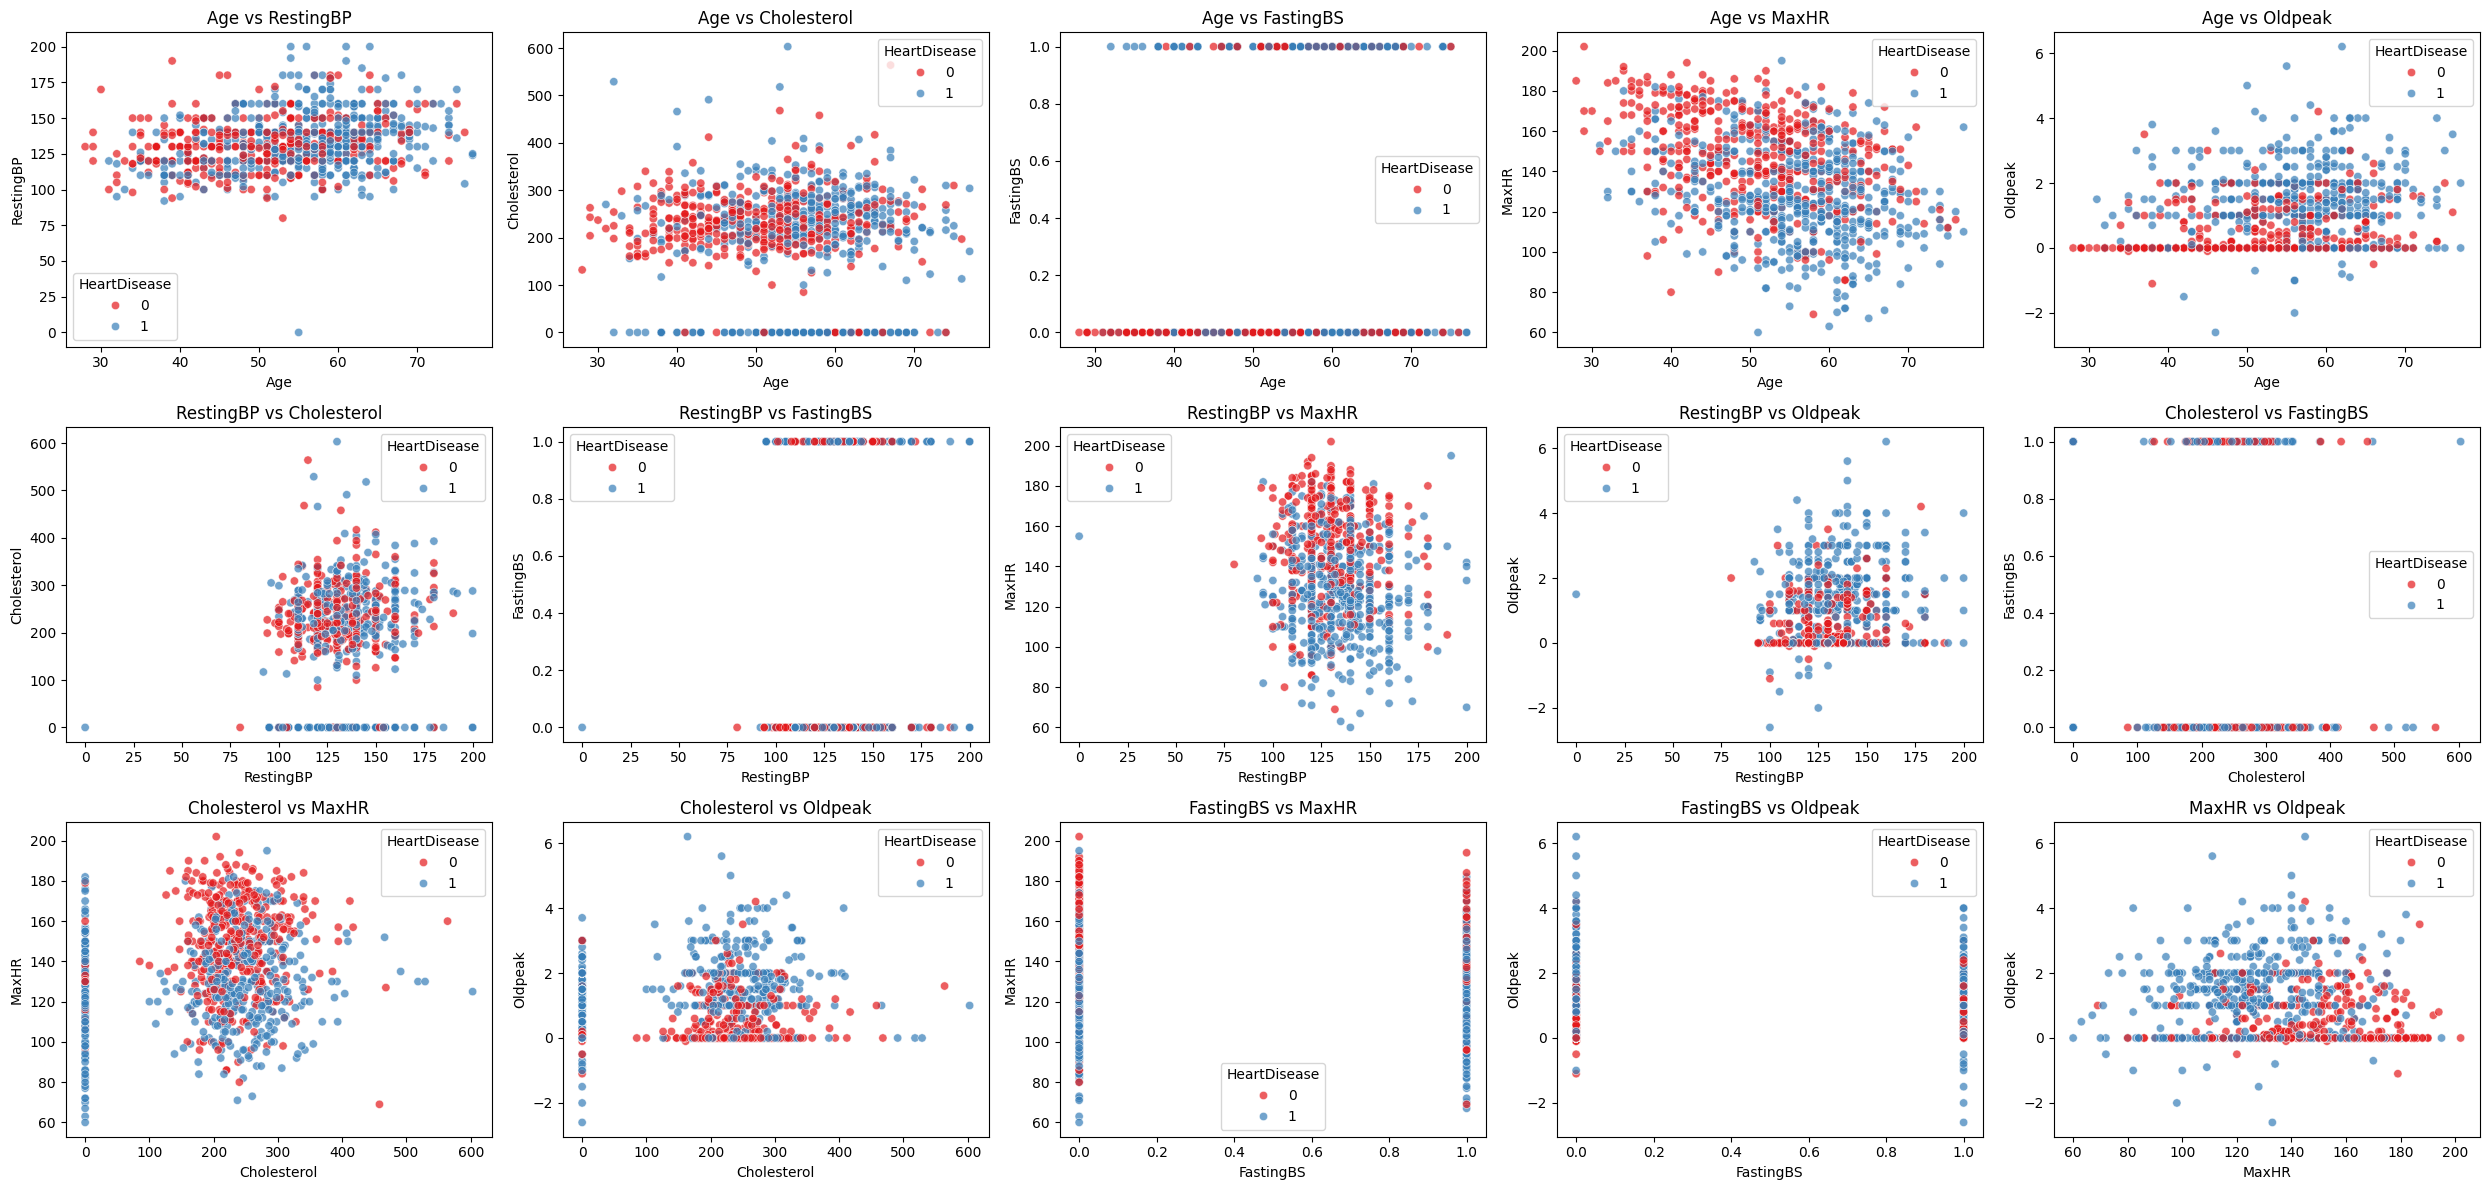

In [22]:
numeric_cols = [col for col in df.columns if col != 'HeartDisease' and df[col].dtype in ['float64', 'int64']]
pairs = list(combinations(numeric_cols, 2))
n_cols = 5
n_rows = (len(pairs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs):
        sns.scatterplot(data=df, x=x_col, y=y_col, hue='HeartDisease', palette='Set1', alpha=0.7, ax=axes[i])
        axes[i].set_title(f'{x_col} vs {y_col}')
        axes[i].legend().set_title('HeartDisease')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'HeartDisease']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Column: {col}")
    print(f"outliers: {outliers.shape[0]}")
    print("-" * 40)

Column: Age
outliers: 0
----------------------------------------
Column: RestingBP
outliers: 28
----------------------------------------
Column: Cholesterol
outliers: 183
----------------------------------------
Column: FastingBS
outliers: 214
----------------------------------------
Column: MaxHR
outliers: 2
----------------------------------------
Column: Oldpeak
outliers: 16
----------------------------------------


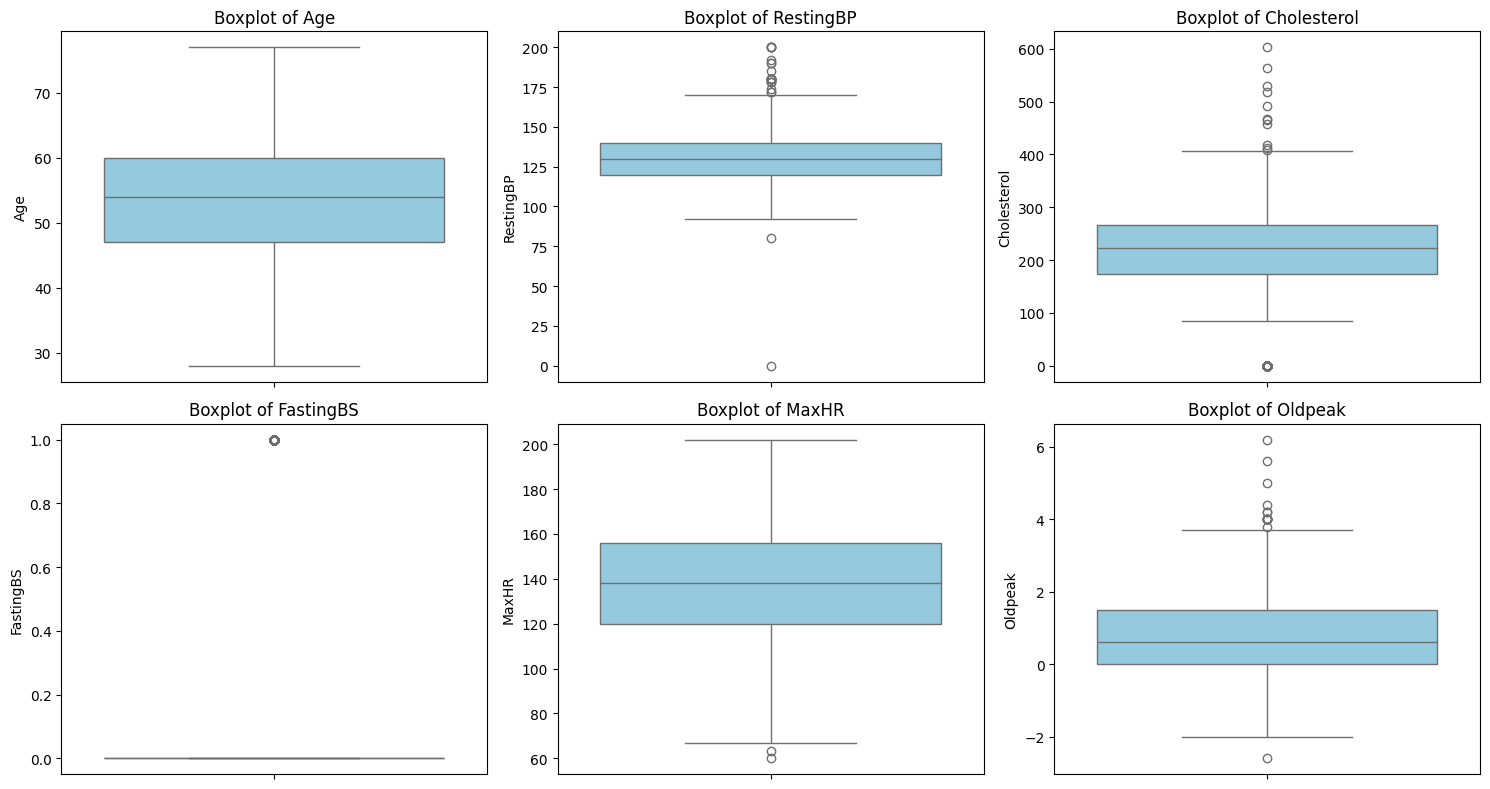

In [24]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)  
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'stroke']

categorical_cols = df.select_dtypes(include='category').columns.tolist()

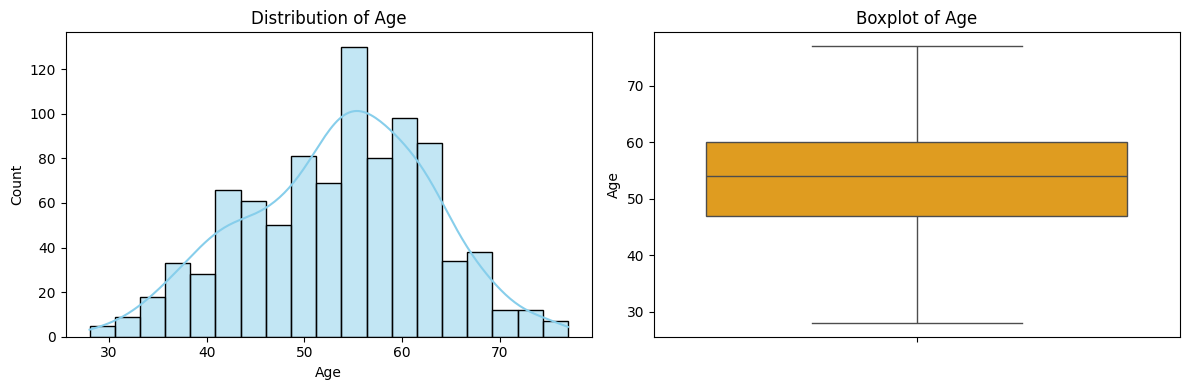

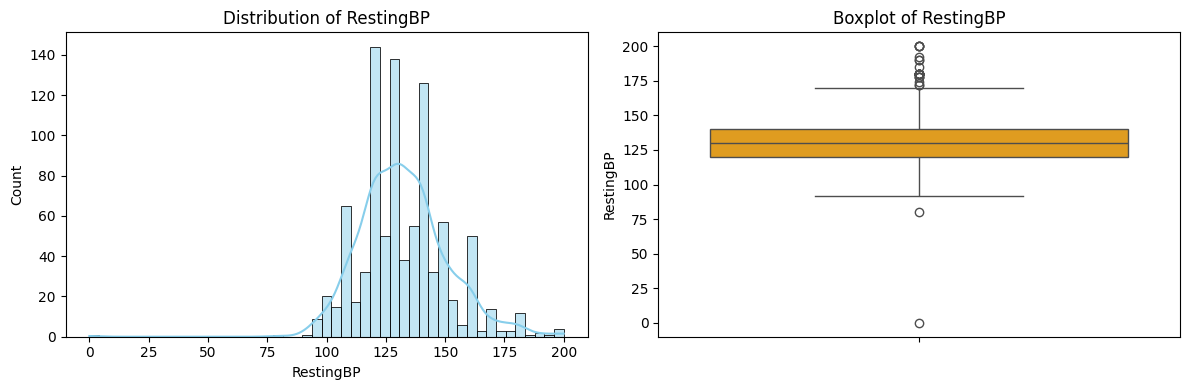

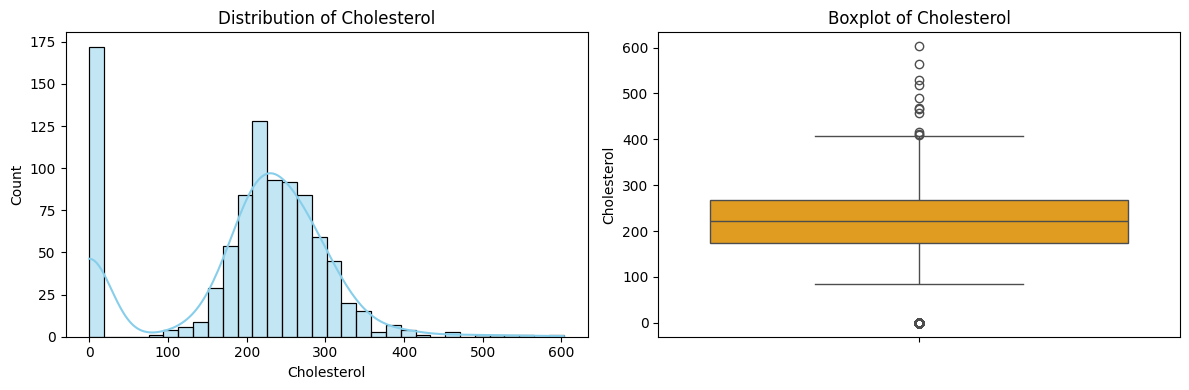

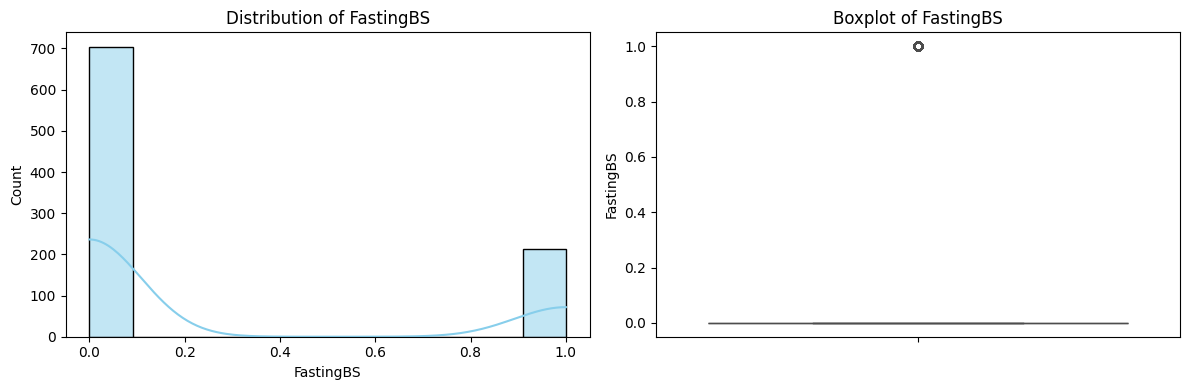

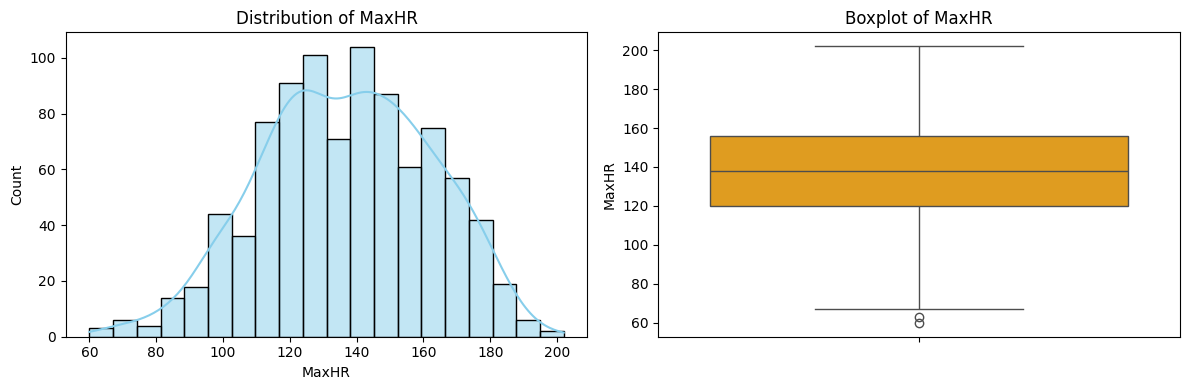

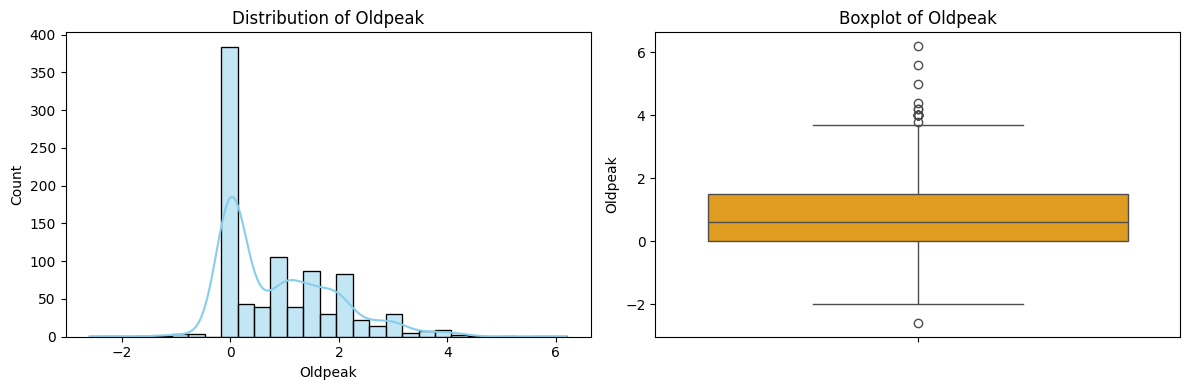

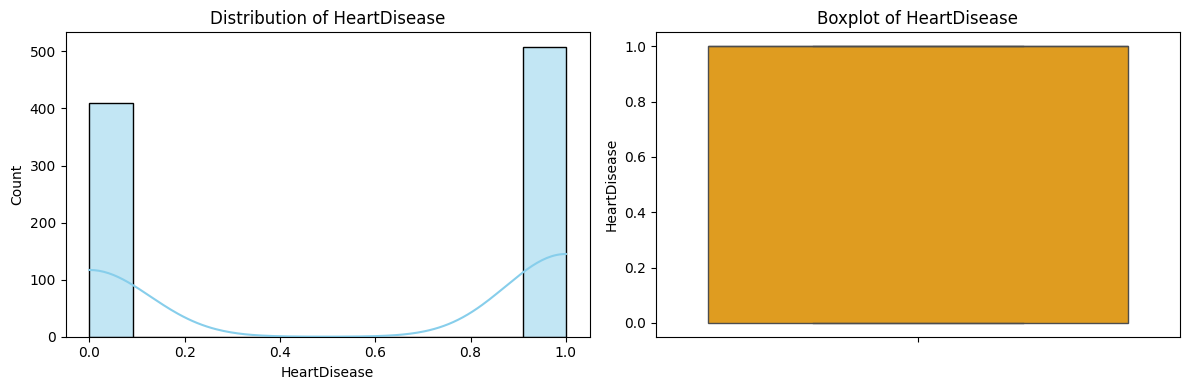

In [26]:
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_789/1592545541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


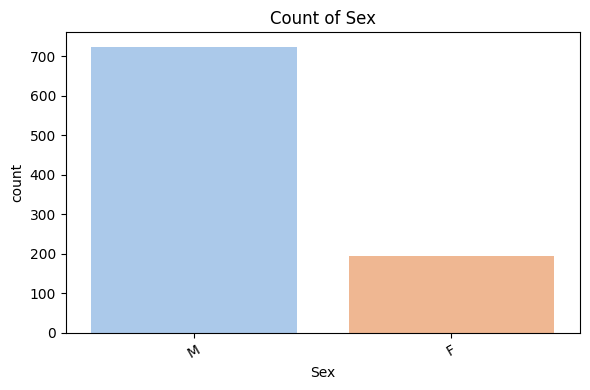

/tmp/ipykernel_789/1592545541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


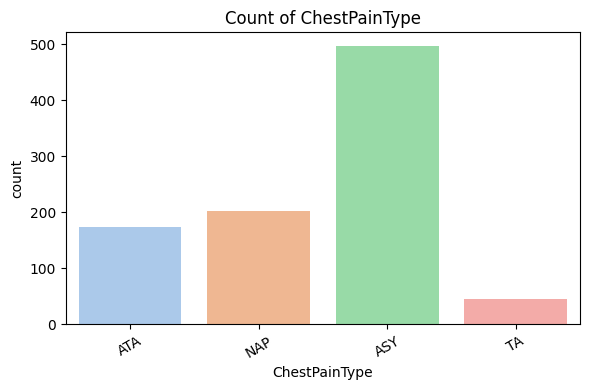

/tmp/ipykernel_789/1592545541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


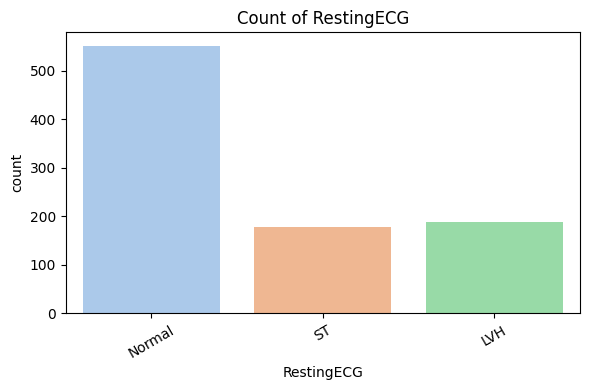

/tmp/ipykernel_789/1592545541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


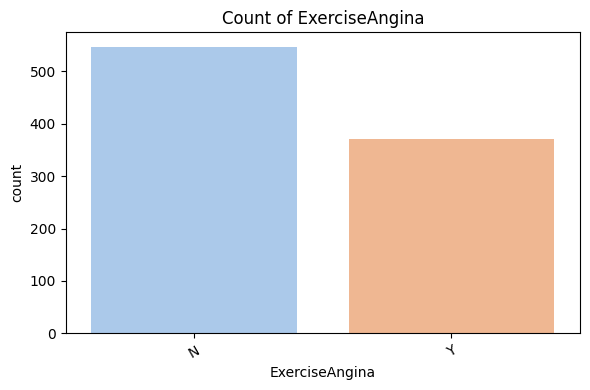

/tmp/ipykernel_789/1592545541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


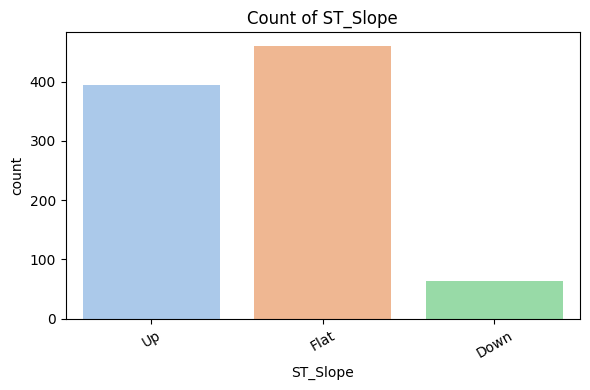

In [27]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


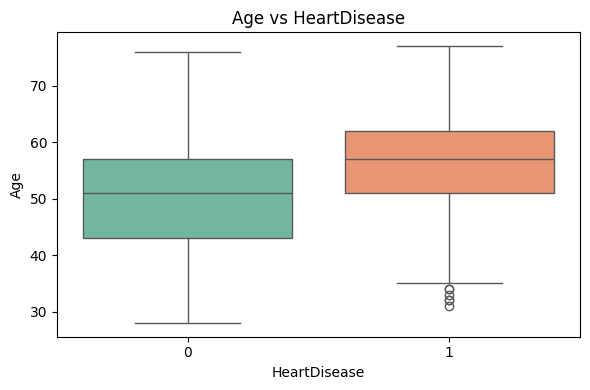

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


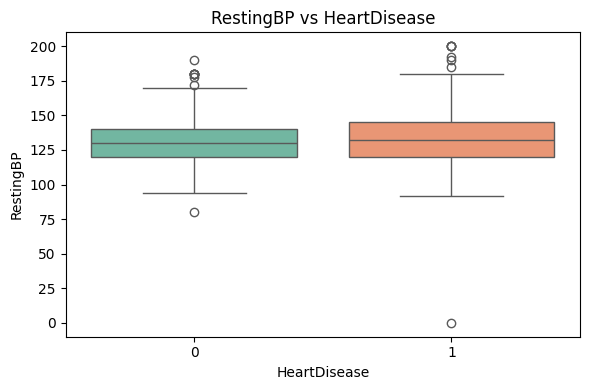

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


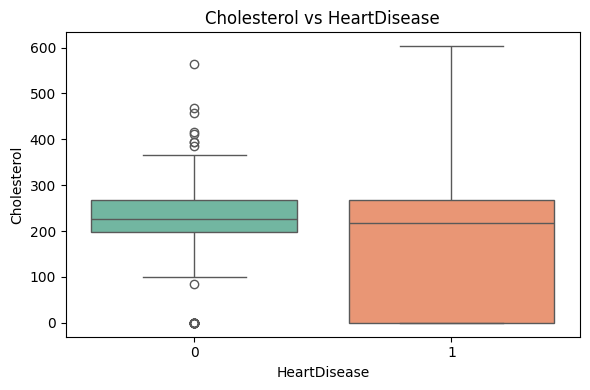

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


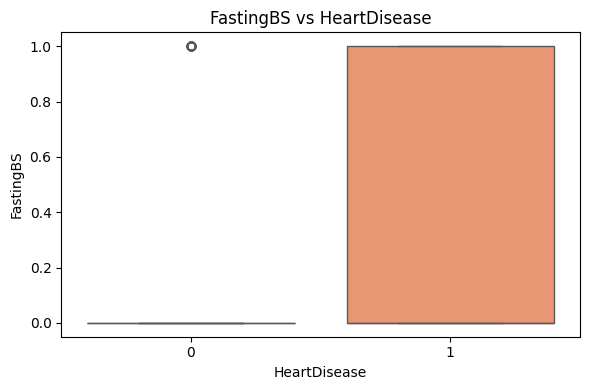

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


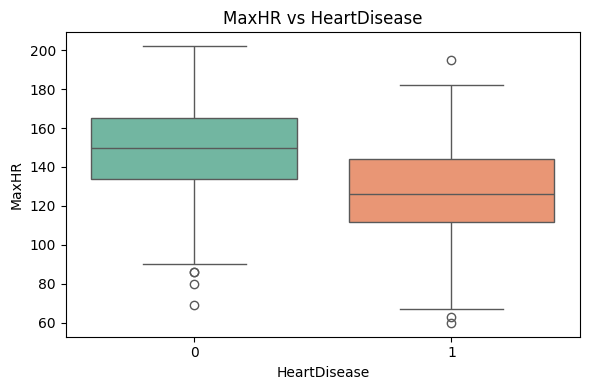

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


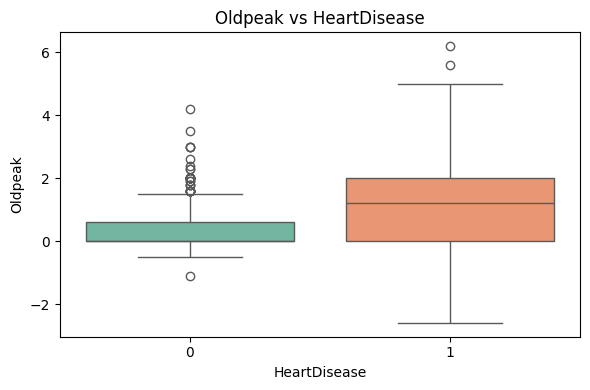

/tmp/ipykernel_789/3018878853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')


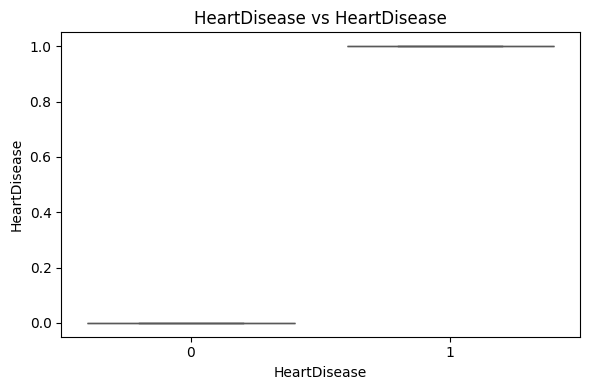

In [28]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['HeartDisease'], y=df[col], palette='Set2')
    plt.title(f'{col} vs HeartDisease')
    plt.tight_layout()
    plt.show()

In [29]:
for col in categorical_cols:
    fig = px.histogram(
        df,
        x=col,
        color='HeartDisease',
        barmode='group',
        title=f'{col} vs HeartDisease',
        color_discrete_sequence=['#EF553B', '#636EFA'] 
    )
    fig.update_layout(xaxis_title=col, yaxis_title='Count')
    fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# target = 'HeartDisease'

# numerical = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
# categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# X = df[numerical + categorical]
# y = df[target]
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, numerical),
#     ('cat', categorical_transformer, categorical)
# ])

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# X_train_processed = preprocessor.fit_transform(X_train)
# X_test_processed = preprocessor.transform(X_test)
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "SVM": SVC(probability=True),
#     "Naive Bayes": GaussianNB(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "AdaBoost": AdaBoostClassifier()}
# results = []

# for name, model in models.items():
#     model.fit(X_train_resampled, y_train_resampled)
#     y_pred = model.predict(X_test_processed)
#     y_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None

#     results.append({
#         "Model": name,
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred, zero_division=0),
#         "Recall": recall_score(y_test, y_pred, zero_division=0),
#         "F1 Score": f1_score(y_test, y_pred, zero_division=0),
#         "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
#     })
# results_df = pd.DataFrame(results)
# results_df = results_df.sort_values(by='F1 Score', ascending=False)
# print(results_df)


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# df_encoded = df.copy()
# for col in df_encoded.select_dtypes(include='object').columns:
#     df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# X = df_encoded.drop(columns=['HeartDisease'])
# y = df_encoded['HeartDisease']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# models = {
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     "LightGBM": LGBMClassifier(random_state=42),
#     "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
#     "Balanced RF": BalancedRandomForestClassifier(random_state=42),
#     "Easy Ensemble": EasyEnsembleClassifier(random_state=42)
# }

# results = []
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]

#     results.append({
#         "Model": name,
#         "Accuracy": round(accuracy_score(y_test, y_pred), 6),
#         "Precision": round(precision_score(y_test, y_pred, zero_division=0), 6),
#         "Recall": round(recall_score(y_test, y_pred), 6),
#         "F1 Score": round(f1_score(y_test, y_pred), 6),
#         "ROC AUC": round(roc_auc_score(y_test, y_proba), 6)
#     })

# results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
# results_df
# results_df

In [35]:
import joblib
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

logistic = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=(neg/pos), use_label_encoder=False, eval_metric='logloss', random_state=42)
easy = EasyEnsembleClassifier(random_state=42, n_estimators=10)


ensemble = VotingClassifier(
    estimators=[
        ('easy', easy),
        ('logreg', logistic),
        ('xgb', xgb),
        ('rf', rf)
    ],
    voting='soft',
    weights=[2.0, 1.5, 1.0, 1.0]
)


model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", ensemble)
])


model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.45
y_pred = (y_proba >= threshold).astype(int)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print(f"\n🎯 ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

joblib.dump(model, "be_model.pkl")
print("✅ Model saved as 'best_model.pkl'")

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning:

[15:01:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🔍 Confusion Matrix:
[[67 10]
 [ 9 98]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        77
           1       0.91      0.92      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184


🎯 ROC AUC Score: 0.9386
✅ Model saved as 'best_model.pkl'


In [39]:
import pkg_resources

packages = [
    "streamlit",
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "plotly",
    "imblearn",
    "scikit-learn",
    "xgboost",
    "lightgbm",
    "catboost",
    "joblib",
    "altair",
    "scipy",
    "python-dateutil",
]

with open("requiremes.txt", "w") as f:
    for package in packages:
        try:
            version = pkg_resources.get_distribution(package).version
            f.write(f"{package}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"[!] Package '{package}' not found. Skipping.")

In [37]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

with open("model_results.txt", "w", encoding="utf-8") as f:
    f.write(f"الدقة: {accuracy}\n")
    f.write(report)
print("model_results.txt")

model_results.txt
